C:\Users\DELL\AppData\Local\Temp\ipykernel_25048\3276934831.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="type", palette="viridis")


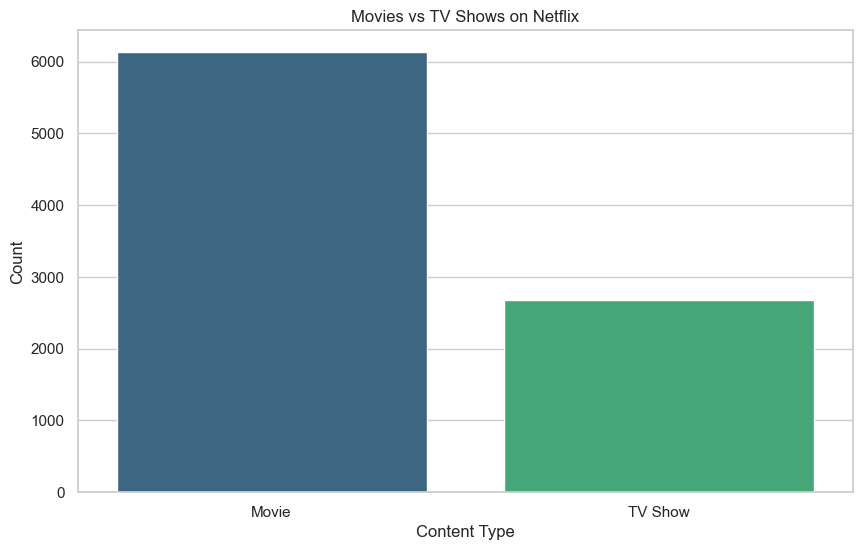

Chart saved: ../charts/netflix_movies_vs_tvshows.png


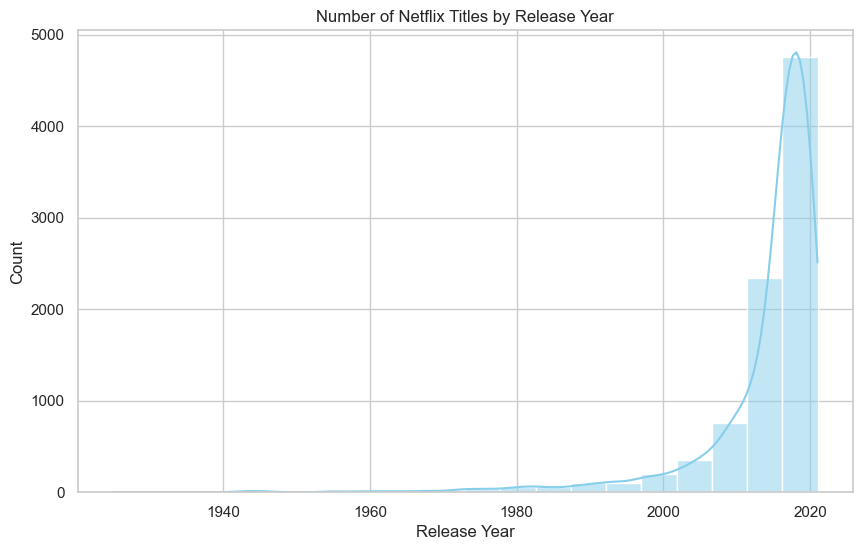

Chart saved: ../charts/netflix_release_year_trend.png


C:\Users\DELL\AppData\Local\Temp\ipykernel_25048\3276934831.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="mako")


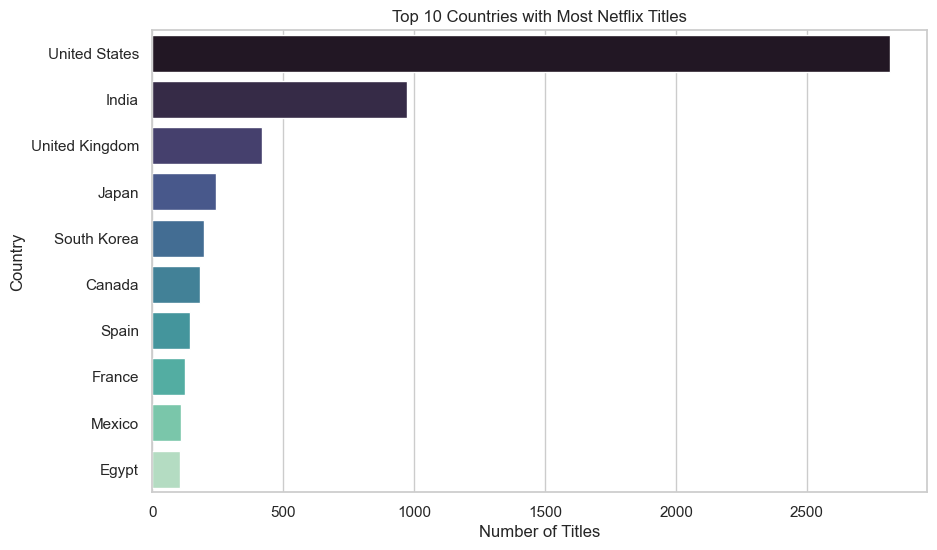

Chart saved: ../charts/netflix_top10_countries.png


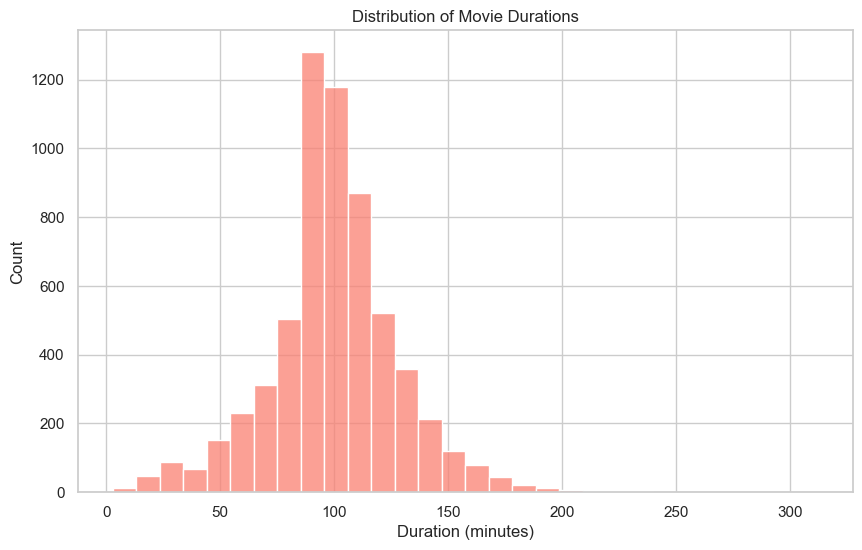

Chart saved: ../charts/netflix_movie_duration_distribution.png


In [12]:
# Project 1: Netflix Data Analysis
# Author: Yiwen Bai
# Description: Exploratory data analysis on Netflix Movies and TV Shows dataset.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

df = pd.read_csv("../data/raw/netflix_titles.csv")

df.head()

import os

def save_chart(filename):
    
    os.makedirs("../charts", exist_ok=True)
    filepath = f"../charts/{filename}.png"
    plt.savefig(filepath, bbox_inches="tight")
    plt.show()
    print(f"Chart saved: {filepath}")

sns.countplot(data=df, x="type", palette="viridis")
plt.title("Movies vs TV Shows on Netflix")
plt.xlabel("Content Type")
plt.ylabel("Count")

save_chart("netflix_movies_vs_tvshows")

sns.histplot(data=df, x='release_year', bins=20, kde=True, color='skyblue')
plt.title("Number of Netflix Titles by Release Year")
plt.xlabel("Release Year")
plt.ylabel("Count")

save_chart("netflix_release_year_trend")

top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette="mako")
plt.title("Top 10 Countries with Most Netflix Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Country")

save_chart("netflix_top10_countries")

movies_df = df[df['type'] == 'Movie'].copy()
movies_df['duration'] = movies_df['duration'].str.replace(' min', '', regex=False).astype(float)

sns.histplot(movies_df['duration'], bins=30, color='salmon')
plt.title("Distribution of Movie Durations")
plt.xlabel("Duration (minutes)")
plt.ylabel("Count")

save_chart("netflix_movie_duration_distribution")


In [2]:

df.info()

print("\nMissing values:")
print(df.isnull().sum())

df.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB

Missing values:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
desc

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


Key Insights from Netflix Data
- Netflix’s movie count significantly exceeds its TV show count.
- The majority of Netflix content has been produced after 2010, indicating recent growth.
- The United States, India, and the UK dominate in Netflix content production.
- Most Netflix movies are between 80–120 minutes long.

Next steps:
- Add IMDb ratings or audience reviews for deeper analysis.
- Explore genre-based performance and audience preference trends.